In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

import seaborn as sns

adult_df = pd.read_csv('adult.csv')

# 1. What is the distribution of ages in the dataset?

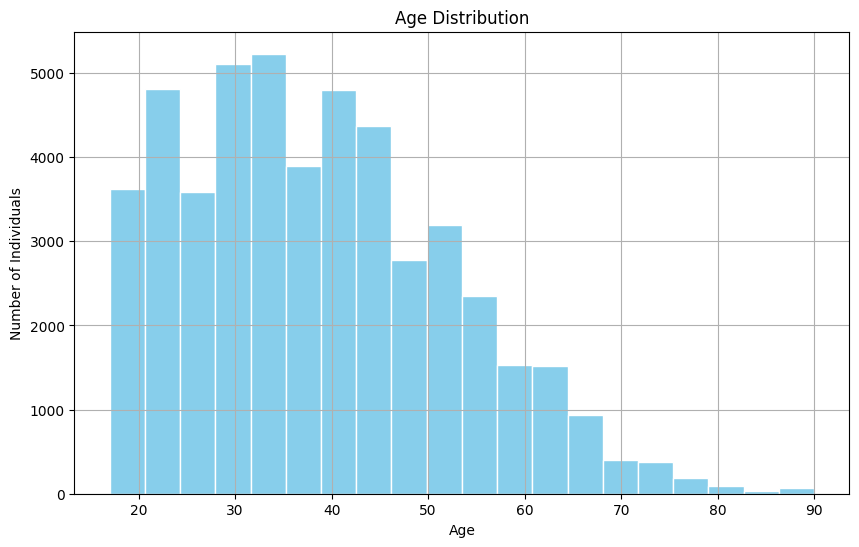

In [34]:
# Using matplotlib
plt.figure(figsize=(10,6))
adult_df['age'].hist(bins=20, color='skyblue', edgecolor='white')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Number of Individuals')
plt.show()

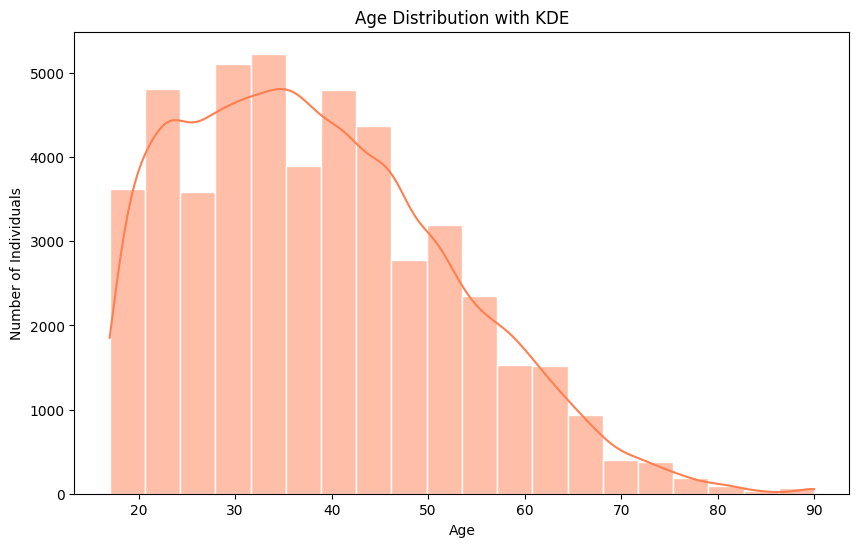

In [35]:
# Using seaborn
plt.figure(figsize=(10,6))

sns.histplot(adult_df['age'], bins=20, color='coral', edgecolor='white', kde=True)

plt.title('Age Distribution with KDE')
plt.xlabel('Age')
plt.ylabel('Number of Individuals')
plt.show()

# 2. How does education level correlate with income?

In [36]:
# Grouping by education and income
education_income = adult_df.groupby(['education', 'income']).size().unstack()
education_income

income,<=50K,>50K
education,,
10th,1302,87
11th,1720,92
12th,609,48
1st-4th,239,8
5th-6th,482,27
7th-8th,893,62
9th,715,41
Assoc-acdm,1188,413
Assoc-voc,1539,522


<Axes: xlabel='education'>

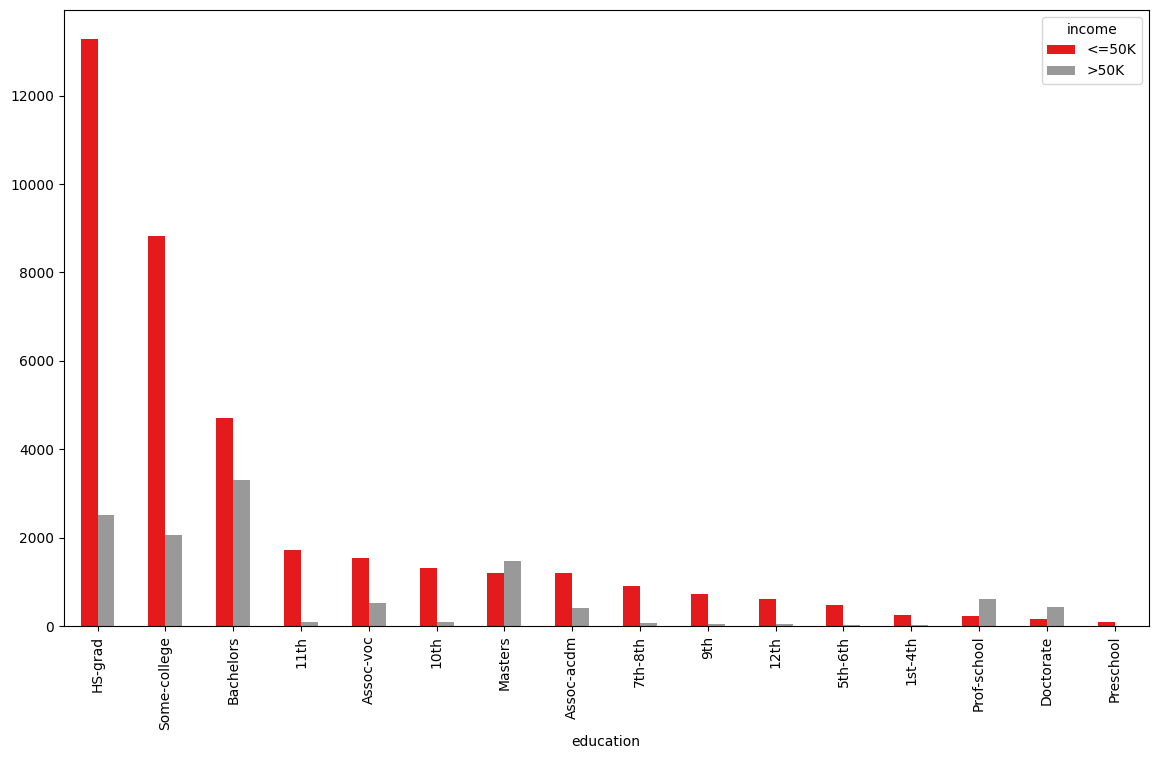

In [37]:
# Grouping and Sorting the DataFrame
education_income = adult_df.groupby(['education', 'income']).size().unstack().sort_values(by='<=50K', ascending=False)

# Easy plotting the counts
education_income.plot(kind='bar', figsize=(14,8), cmap='Set1')

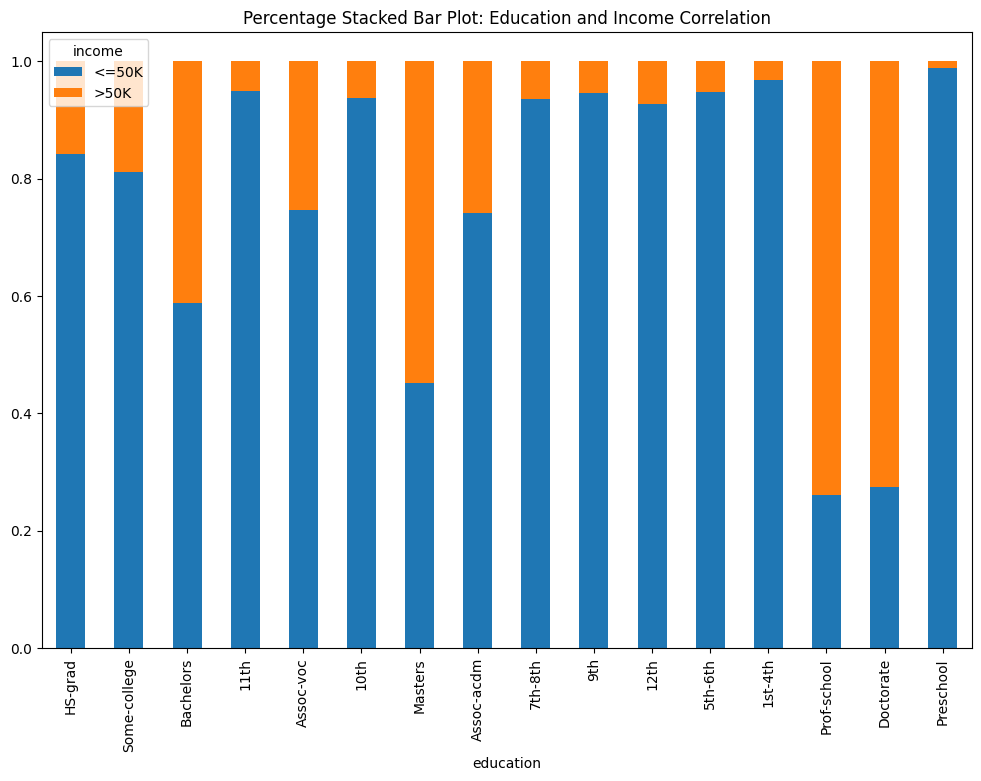

In [38]:
# Calculating percentages
education_income_percent = education_income.div(education_income.sum(axis=1), axis=0)

# Plotting percentage stacked bar chart
education_income_percent.plot(kind='bar', stacked=True, figsize=(12,8))
plt.title('Percentage Stacked Bar Plot: Education and Income Correlation')
plt.show()

# 3. What is the average number of hours worked per week by different genders?

In [39]:
# Calculating the mean hours per week by gender
adult_df.groupby('gender').agg({'hours-per-week': 'mean'})

,hours-per-week
gender,
Female,36.400692
Male,42.416845


In [40]:
# Another way of getting the same output, but without "agg"
adult_df.groupby('gender')['hours-per-week'].mean()

gender
Female    36.400692
Male      42.416845
Name: hours-per-week, dtype: float64

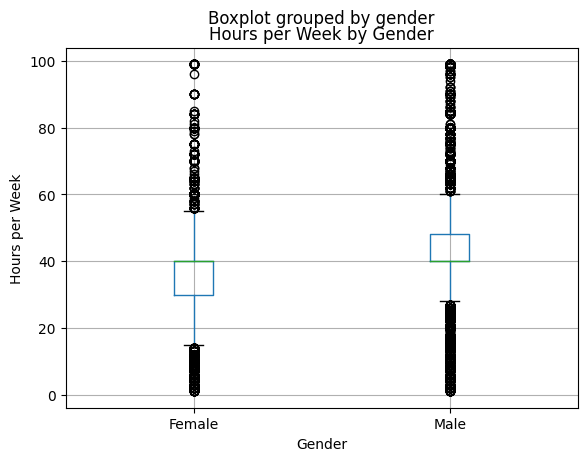

In [41]:
# Basic boxplot of hours per week by gender
adult_df.boxplot('hours-per-week', by='gender')
plt.title('Hours per Week by Gender')
plt.xlabel('Gender')
plt.ylabel('Hours per Week')
plt.show()

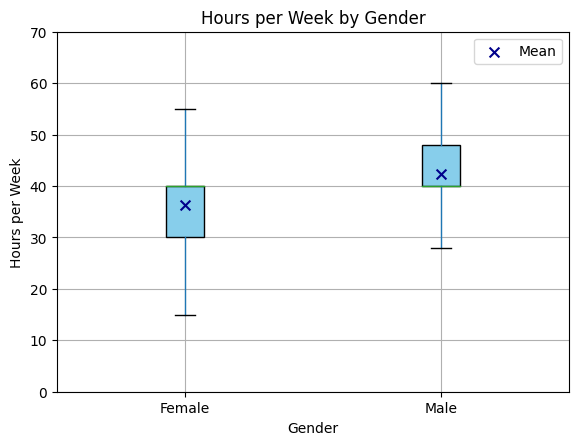

In [42]:
# More advanced and much more clear boxplot of hours per week by gender, without presenting the outliers 
adult_df.boxplot('hours-per-week', by='gender', patch_artist=True, showfliers=False, boxprops=dict(facecolor='skyblue', edgecolor='black'))

means = adult_df.groupby('gender')['hours-per-week'].mean()

# Mean visualization
for i, mean in enumerate(means):
    plt.scatter(i + 1, mean, color='darkblue', zorder=5, label='Mean' if i == 0 else "", marker='x', s=50)

# Additional information to make plot nicely described
plt.title('Hours per Week by Gender')
plt.suptitle('')
plt.xlabel('Gender')
plt.ylabel('Hours per Week')
plt.ylim(0, 70)
plt.legend()

plt.show()

# 4. Which marital status group has the highest proportion of high-income individuals?

In [43]:
# Grouping the dataframe by 'marital-status' and 'income'
occupation_income = adult_df.groupby(['marital-status', 'income']).size().unstack()
occupation_income

income,<=50K,>50K
marital-status,,
Divorced,5962,671
Married-AF-spouse,23,14
Married-civ-spouse,12395,9984
Married-spouse-absent,570,58
Never-married,15384,733
Separated,1431,99
Widowed,1390,128


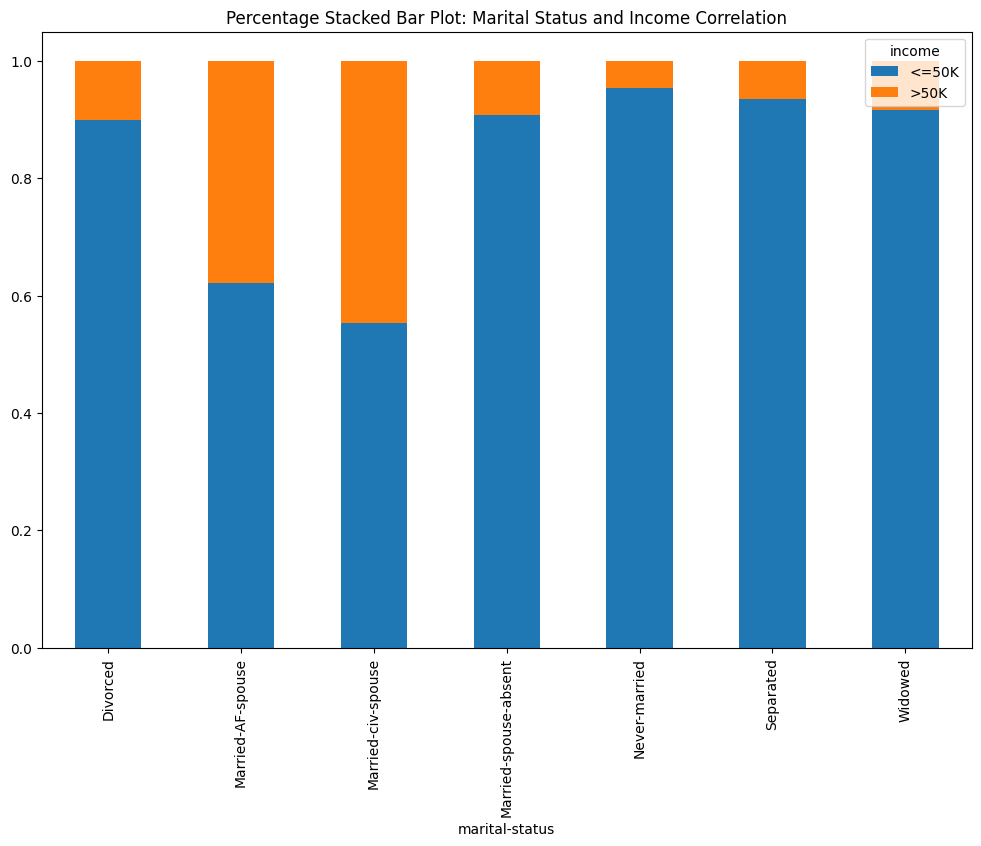

In [44]:
occupation_income = occupation_income.div(occupation_income.sum(axis=1), axis=0)

# First way: Plotting the stacked bar chart
occupation_income.plot(kind='bar', stacked=True, figsize=(12,8))
plt.title('Percentage Stacked Bar Plot: Marital Status and Income Correlation')
plt.show()

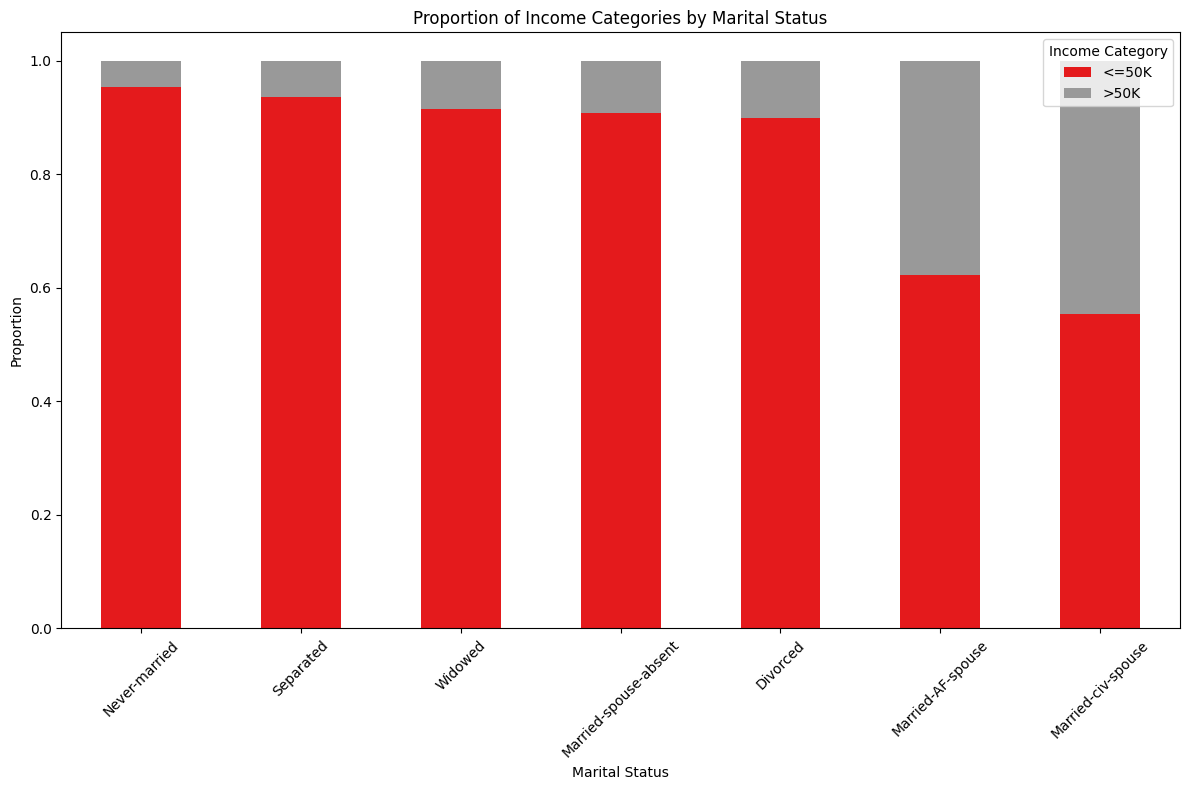

In [45]:
# 2nd way: Creating a crosstab of marital status and income
marital_income_ctab = pd.crosstab(adult_df['marital-status'], adult_df['income'], normalize='index').sort_values(by='>50K')

# Plotting the stacked bar chart
marital_income_ctab.plot(kind='bar', stacked=True, figsize=(12, 8), colormap='Set1')
plt.title('Proportion of Income Categories by Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Proportion')
plt.legend(title='Income Category')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 5. Is there a relationship between occupation type and capital gain?

In [46]:
# Descriptive statistics of capital gain by occupation
occupation_capital_gain_stats = adult_df.groupby('occupation')['capital-gain'].describe()
occupation_capital_gain_stats

,count,mean,std,min,25%,50%,75%,max
occupation,,,,,,,,
?,2809.0,501.155571,4613.057951,0.0,0.0,0.0,0.0,99999.0
Adm-clerical,5611.0,477.036892,4113.800617,0.0,0.0,0.0,0.0,99999.0
Armed-Forces,15.0,486.533333,1884.335497,0.0,0.0,0.0,0.0,7298.0
Craft-repair,6112.0,718.952062,5455.141047,0.0,0.0,0.0,0.0,99999.0
Exec-managerial,6086.0,2277.755504,10974.240618,0.0,0.0,0.0,0.0,99999.0
Farming-fishing,1490.0,715.937584,5288.304997,0.0,0.0,0.0,0.0,99999.0
Handlers-cleaners,2072.0,283.412645,3280.166471,0.0,0.0,0.0,0.0,99999.0
Machine-op-inspct,3022.0,315.227664,2205.167316,0.0,0.0,0.0,0.0,99999.0
Other-service,4923.0,217.127564,2761.678988,0.0,0.0,0.0,0.0,99999.0


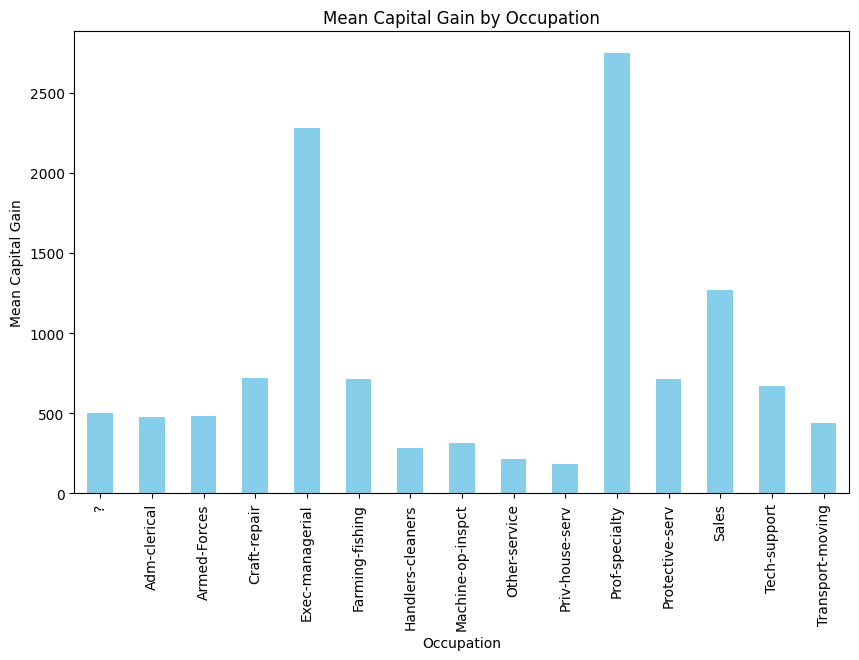

In [47]:
# Mean capital gain by occupation
mean_capital_gain = adult_df.groupby('occupation')['capital-gain'].mean()

# Plot the mean capital gain by occupation
mean_capital_gain.plot(kind='bar', figsize=(10,6), color='skyblue')

# Plotting mean capital gain by occupation
plt.title('Mean Capital Gain by Occupation')
plt.xlabel('Occupation')
plt.ylabel('Mean Capital Gain')
plt.xticks(rotation=90)
plt.show()

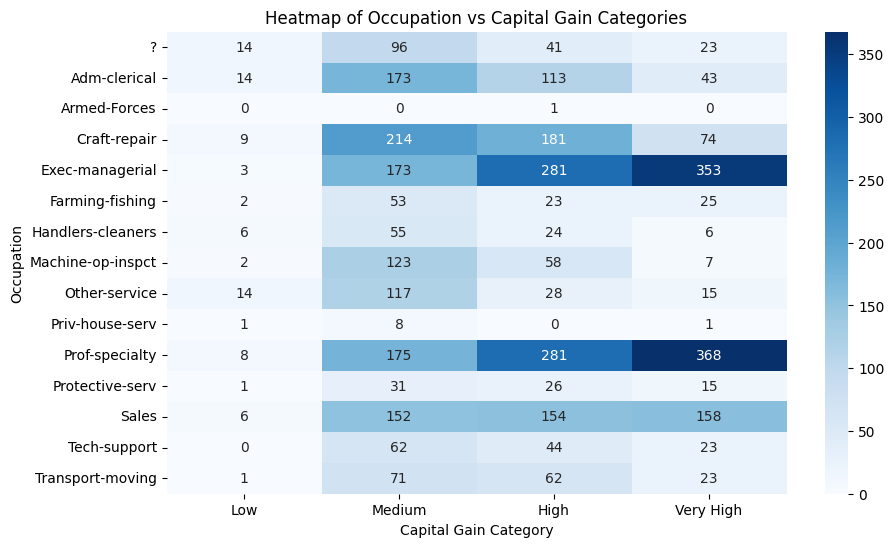

In [48]:
# Creating capital gain categories
bins = [0, 1000, 5000, 10000, adult_df['capital-gain'].max()]
labels = ['Low', 'Medium', 'High', 'Very High']
adult_df['capital-gain-category'] = pd.cut(adult_df['capital-gain'], bins=bins, labels=labels)

# Create a crosstab to see the relationship between occupation and capital gain categories
occupation_gain_crosstab = pd.crosstab(adult_df['occupation'], adult_df['capital-gain-category'])

# Plot a heatmap of the crosstab
plt.figure(figsize=(10,6))
sns.heatmap(occupation_gain_crosstab, annot=True, cmap='Blues', fmt='g')
plt.title('Heatmap of Occupation vs Capital Gain Categories')
plt.xlabel('Capital Gain Category')
plt.ylabel('Occupation')
plt.show()

In [49]:
adult_df['occupation_code'] = adult_df['occupation'].astype('category').cat.codes

# Calculate correlation
correlation = adult_df[['occupation_code', 'capital-gain']].corr()

print(correlation)

                 occupation_code  capital-gain
occupation_code         1.000000      0.024163
capital-gain            0.024163      1.000000


# 6. How does native country influence income levels?

Text(0.5, 0, 'Native Country')

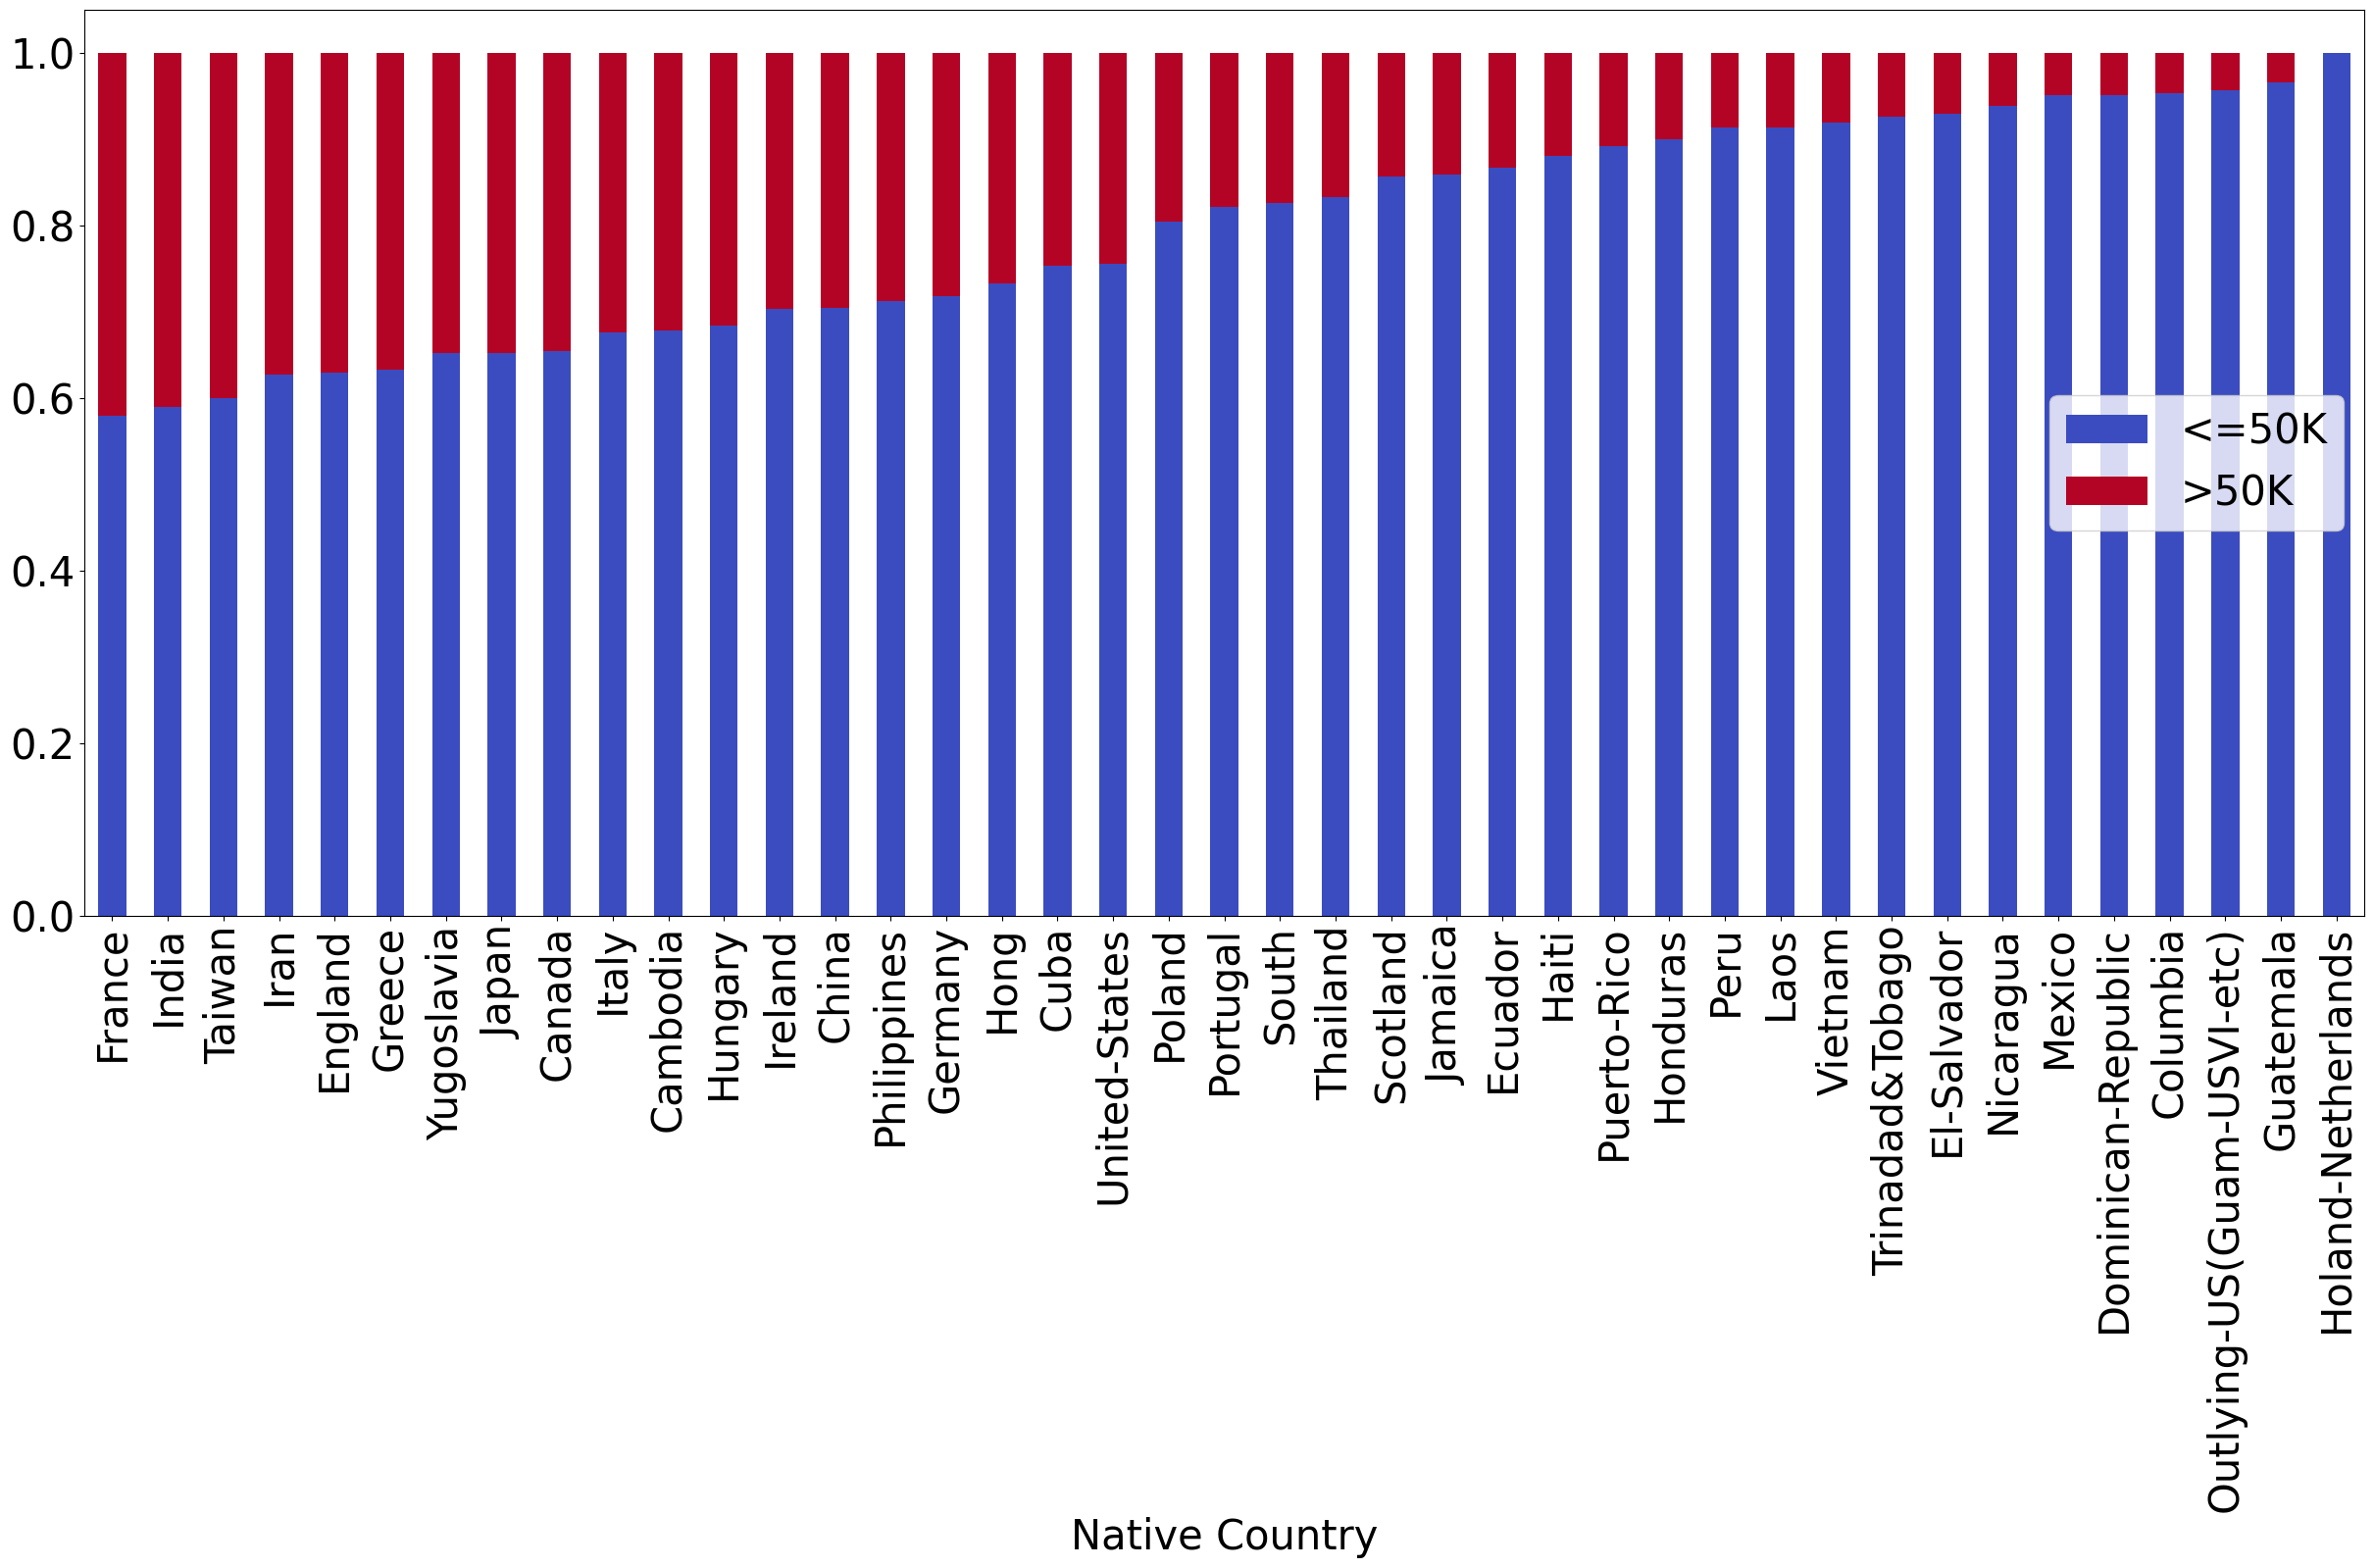

In [50]:
# Handling missing values
adult_df.replace({'?': np.nan}, inplace=True)
adult_df.dropna(subset=['native-country'], inplace=True)

# Creating a crosstab of native country and income and sorting by the proportion of high-income values
country_income_df = pd.crosstab(adult_df['native-country'], adult_df['income'], normalize='index').sort_values(by='>50K', ascending=False)

# Plotting
country_income_df.plot(kind='bar', stacked=True, cmap='coolwarm', figsize=((30,12)), fontsize=30)
plt.legend(fontsize=30, loc='right')
plt.xlabel('Native Country', fontsize=30)

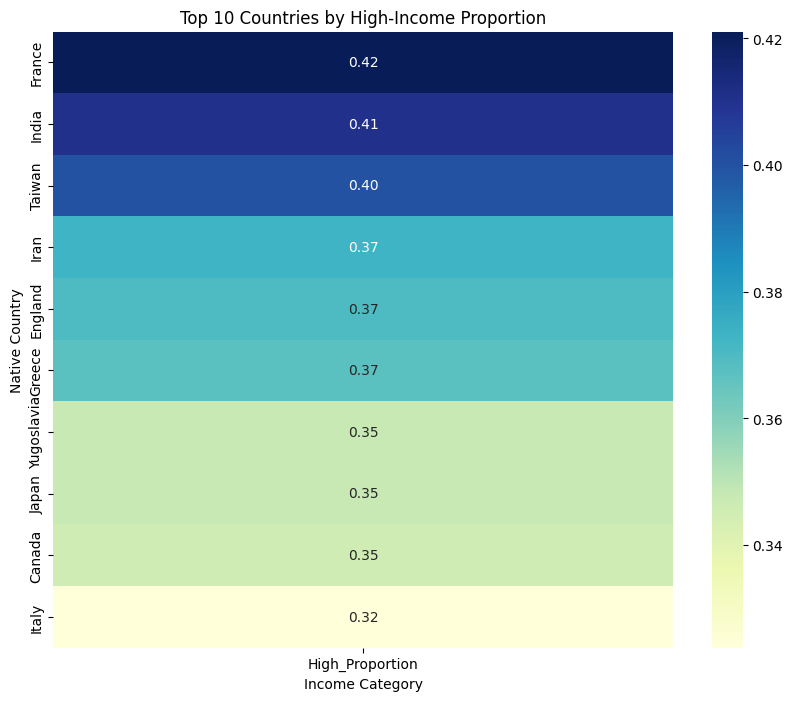

In [51]:
# Create 'income_category' based on 'income'
adult_df['income_category'] = adult_df['income'].apply(lambda x: 'High' if x.strip() == '>50K' else 'Low')

income_country_pivot = pd.pivot_table(
    adult_df,
    values='income',
    index='native-country',
    columns='income_category',
    aggfunc='count',
    fill_value=0
)

# Calculate the proportion of 'High' income
income_country_pivot['High_Proportion'] = income_country_pivot['High'] / (income_country_pivot['High'] + income_country_pivot['Low'])

# Select top 10 countries with the highest proportion of high-income individuals
top_countries = income_country_pivot.sort_values('High_Proportion', ascending=False).head(10)

# Plotting the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(top_countries[['High_Proportion']], annot=True, cmap='YlGnBu', fmt=".2f")
plt.title('Top 10 Countries by High-Income Proportion')
plt.xlabel('Income Category')
plt.ylabel('Native Country')
plt.show()

# 7. What are the top 5 most common occupations among high-income individuals?

In [52]:
# Filtering high-income individuals and counting by occupation
adult_df[adult_df['income_category']=='High'].groupby('occupation')['income_category'].count().sort_values(ascending=False).head()

occupation
Exec-managerial    2867
Prof-specialty     2704
Sales              1455
Craft-repair       1355
Adm-clerical        756
Name: income_category, dtype: int64

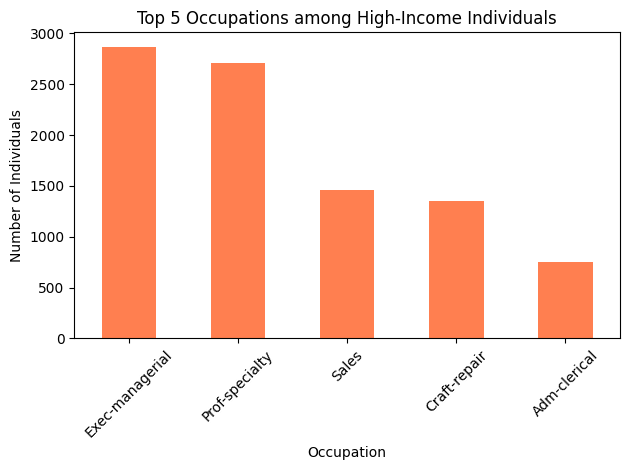

In [53]:
# Plotting the top 5 most common occupations among high-income individuals
high_income_df = adult_df[adult_df['income_category']=='High']
top_occupations = high_income_df['occupation'].value_counts().head(5)

top_occupations.plot(kind='bar', color='coral')

plt.title('Top 5 Occupations among High-Income Individuals')
plt.xlabel('Occupation')
plt.ylabel('Number of Individuals')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show() 

# 8. How does education level impact the likelihood of working more than 40 hours per week?

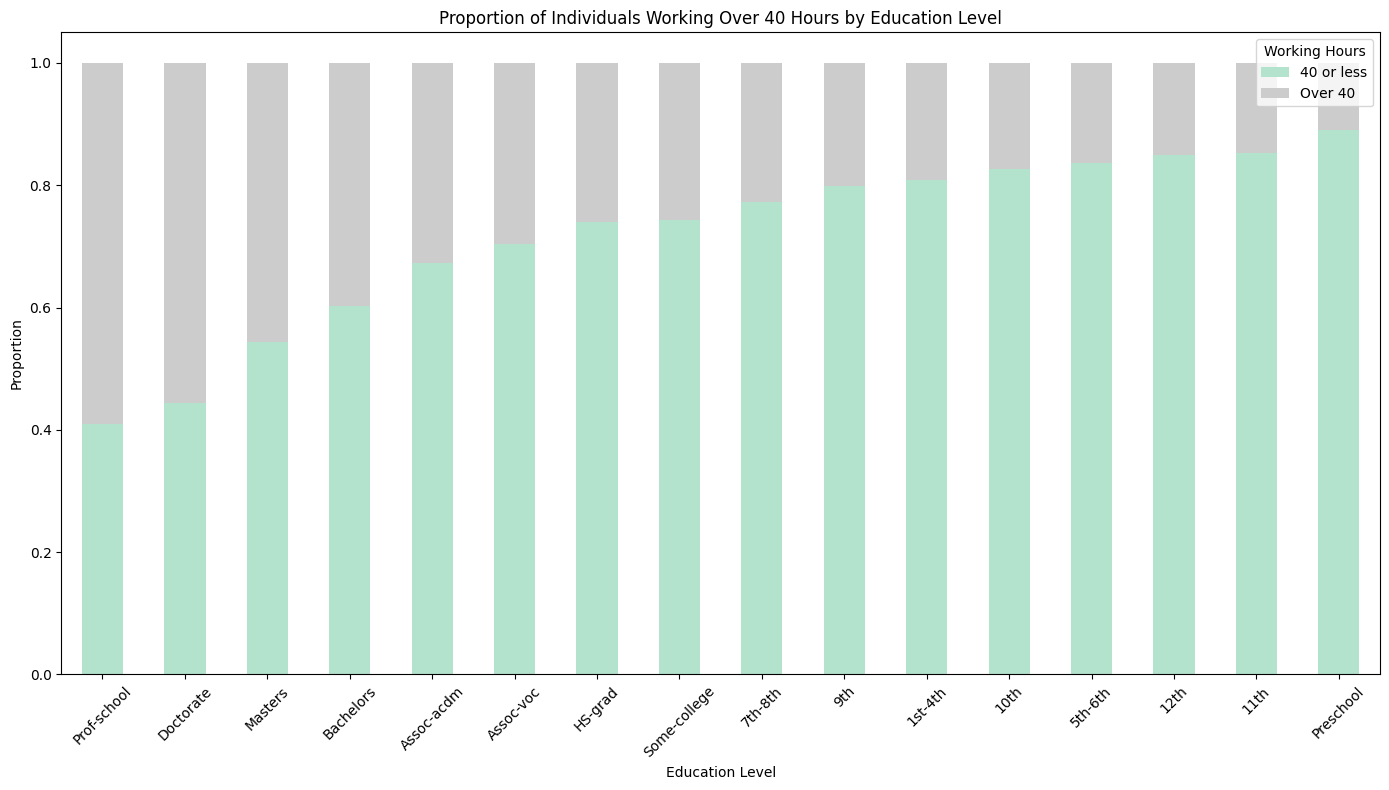

In [54]:
# Creating a new column for working hours category
adult_df['over_40_hours'] = adult_df['hours-per-week'].apply(lambda x: 'Over 40' if x > 40 else '40 or less')

# Creating sorted crosstab
education_hours = pd.crosstab(adult_df['education'], adult_df['over_40_hours'], normalize='index').sort_values(by='Over 40', ascending=False)

# Plotting the stacked bar chart
education_hours.plot(kind='bar', stacked=True, figsize=(14,8), colormap='Pastel2')
plt.title('Proportion of Individuals Working Over 40 Hours by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Proportion')
plt.legend(title='Working Hours')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 9. How does capital gain trend across different education levels and vary by gender?

<Figure size 1800x800 with 0 Axes>

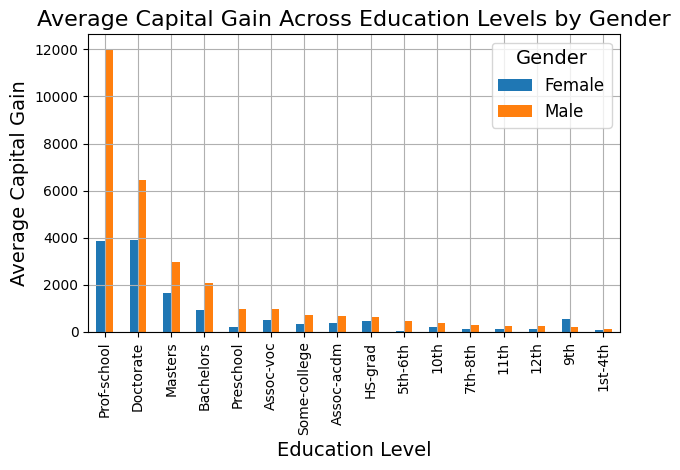

In [55]:
# Calculating mean capital gain by education and gender
capital_gain_grouped = adult_df.groupby(['education', 'gender'])['capital-gain'].mean().reset_index()

# Pivoting the DataFrame
capital_gain_pivot = capital_gain_grouped.pivot(index='education', columns='gender', values='capital-gain')

# Sorting by capital gain for males
capital_gain_pivot = capital_gain_pivot.sort_values(by='Male', ascending=False)

# Plotting the bar chart
plt.figure(figsize=(18, 8))
capital_gain_pivot.plot(kind='bar')
plt.title('Average Capital Gain Across Education Levels by Gender', fontsize=16)
plt.xlabel('Education Level', fontsize=14)
plt.ylabel('Average Capital Gain', fontsize=14)
plt.legend(title='Gender', fontsize=12, title_fontsize=14)
plt.grid(True)
plt.xticks(ticks=range(len(capital_gain_pivot.index)), labels=capital_gain_pivot.index, rotation=90)
plt.tight_layout()
plt.show()

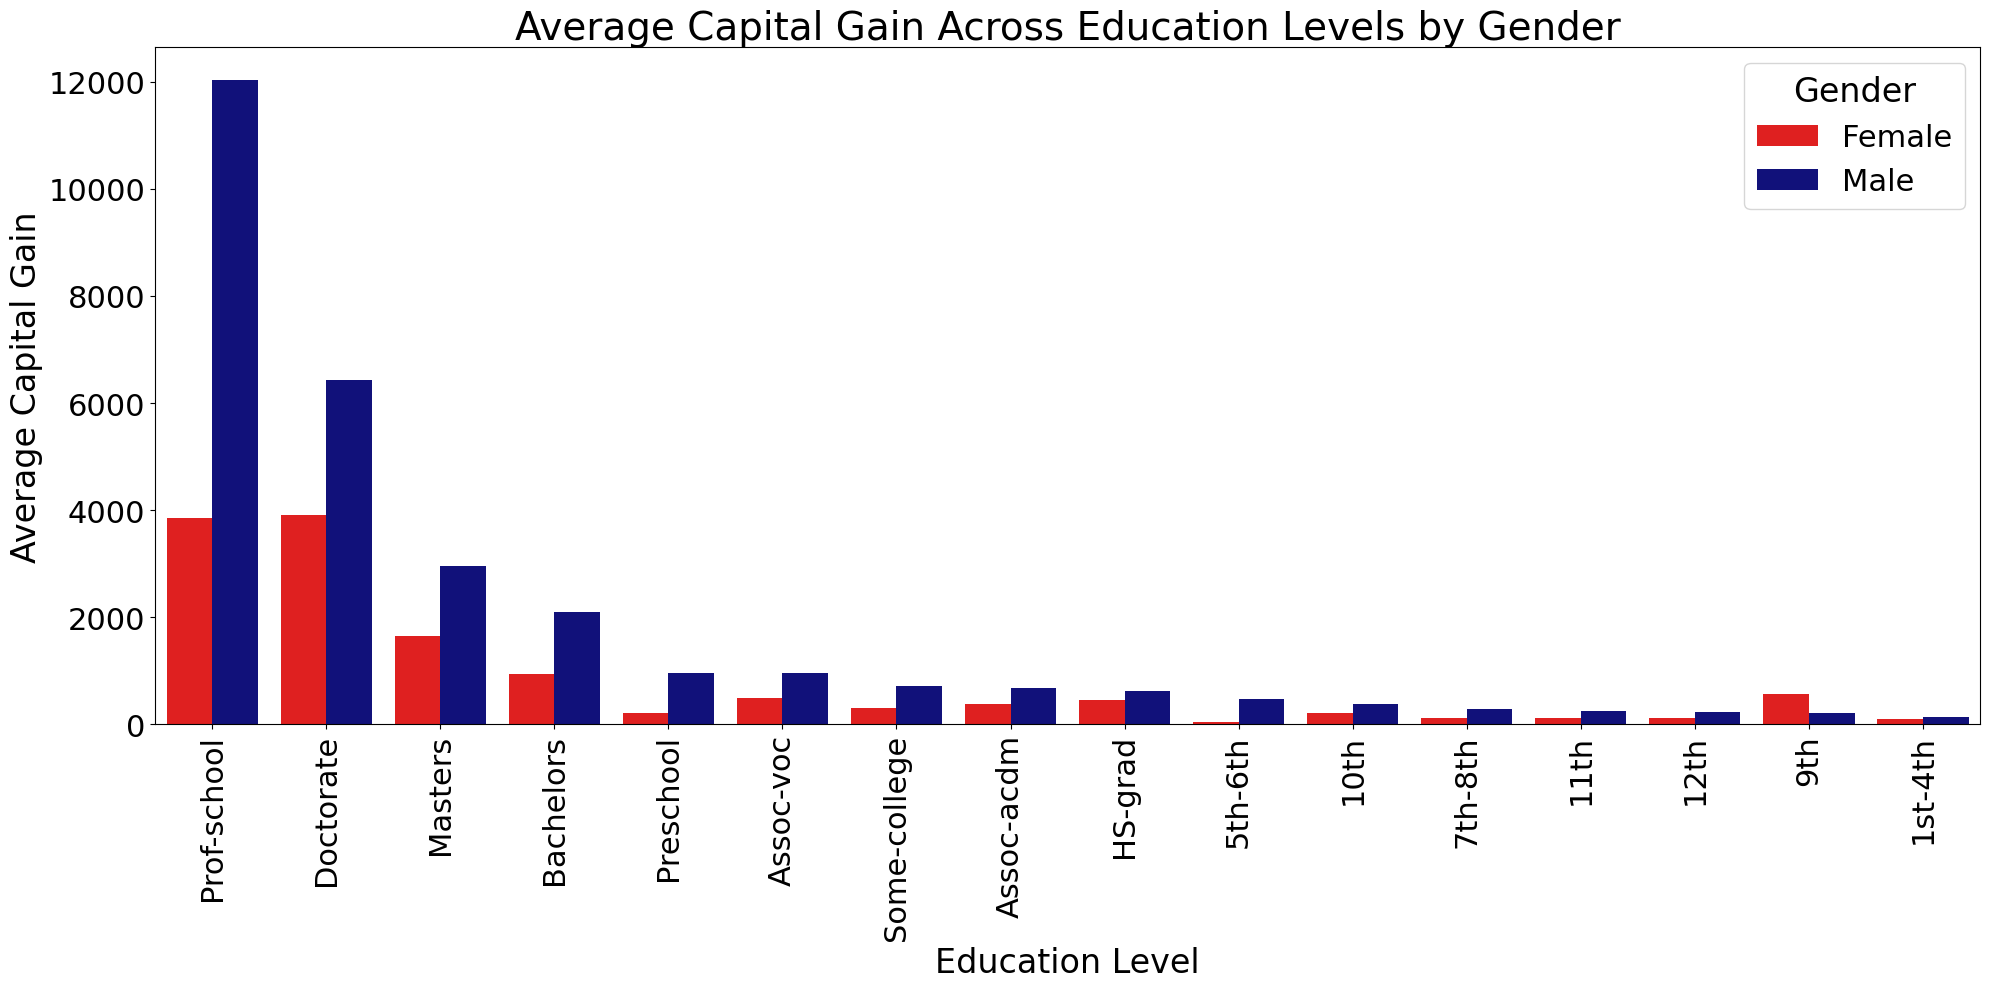

In [56]:
# Calculating mean capital gain by education and gender
capital_gain_grouped = adult_df.groupby(['education', 'gender'])['capital-gain'].mean().reset_index()

# Pivoting the DataFrame
capital_gain_pivot = capital_gain_grouped.pivot(index='education', columns='gender', values='capital-gain')

# Sorting by capital gain for males
capital_gain_pivot = capital_gain_pivot.sort_values(by='Male', ascending=False)

# Resetting the index for easier plotting with seaborn
capital_gain_pivot = capital_gain_pivot.reset_index()

# Melting the DataFrame for seaborn
capital_gain_melted = capital_gain_pivot.melt(id_vars='education', var_name='gender', value_name='capital_gain')

# Plotting the bar chart
plt.figure(figsize=(20, 10))
sns.barplot(
    data=capital_gain_melted,
    x='education',
    y='capital_gain',
    hue='gender',
    palette={'Female': 'red', 'Male': 'darkblue'}
)
plt.title('Average Capital Gain Across Education Levels by Gender', fontsize=28)
plt.xlabel('Education Level', fontsize=24)
plt.ylabel('Average Capital Gain', fontsize=24)
plt.legend(title='Gender', fontsize=22, title_fontsize=24)
plt.yticks(fontsize=22)
plt.xticks(rotation=90, fontsize=22)
plt.tight_layout()
plt.show()

# 10. How can we identify and analyze outliers in hours worked per week across different occupations?

In [57]:
# Calculating IQR for hours-per-week within each occupation
grouped = adult_df.groupby('occupation')['hours-per-week']
Q1 = grouped.quantile(0.25)
Q3 = grouped.quantile(0.75)
IQR = Q3 - Q1

# Calculating lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print('Lower Bound:\n',lower_bound.head())
print('\nUpper Bound:\n',upper_bound.head())

Lower Bound:
 occupation
Adm-clerical       35.0
Armed-Forces       28.0
Craft-repair       32.5
Exec-managerial    25.0
Farming-fishing    10.0
Name: hours-per-week, dtype: float64

Upper Bound:
 occupation
Adm-clerical       43.0
Armed-Forces       60.0
Craft-repair       52.5
Exec-managerial    65.0
Farming-fishing    90.0
Name: hours-per-week, dtype: float64


In [58]:
# Merging bounds back to the DataFrame
adult_df = adult_df.join(lower_bound, on='occupation', rsuffix='_lower')
adult_df = adult_df.join(upper_bound, on='occupation', rsuffix='_upper')

# Identifying outliers
adult_df['is_outlier'] = ((adult_df['hours-per-week'] < adult_df['hours-per-week_lower']) | 
                           (adult_df['hours-per-week'] > adult_df['hours-per-week_upper']))

adult_df[['occupation', 'hours-per-week', 'is_outlier']].head()

,occupation,hours-per-week,is_outlier
0,Machine-op-inspct,40,False
1,Farming-fishing,50,False
2,Protective-serv,40,False
3,Machine-op-inspct,40,False
4,NaN,30,False


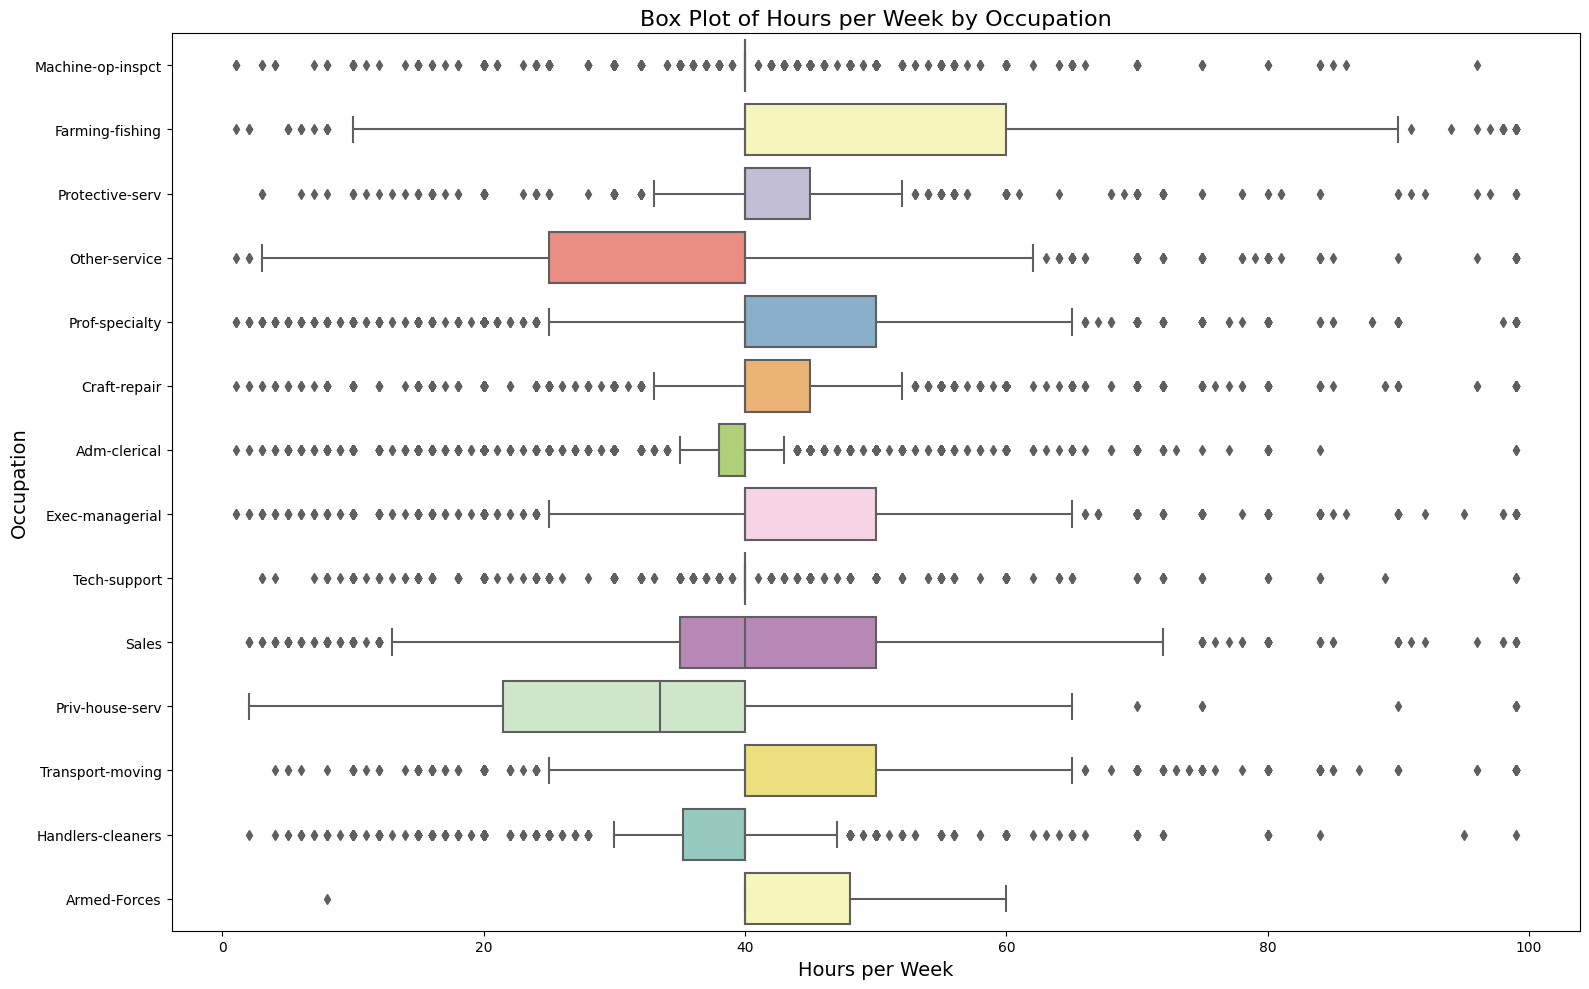

In [59]:
# Visualizing outliers with the boxplots
plt.figure(figsize=(16, 10))
sns.boxplot(x='hours-per-week', y='occupation', data=adult_df, palette='Set3')
plt.title('Box Plot of Hours per Week by Occupation', fontsize=16)
plt.xlabel('Hours per Week', fontsize=14)
plt.ylabel('Occupation', fontsize=14)
plt.tight_layout()
plt.show()

In [60]:
# Closer look at outlier values:
outliers = adult_df[adult_df['is_outlier']]

outliers[['occupation', 'hours-per-week']].head()

,occupation,hours-per-week
9,Craft-repair,10
14,Machine-op-inspct,48
17,Adm-clerical,30
18,Machine-op-inspct,20
20,Tech-support,47


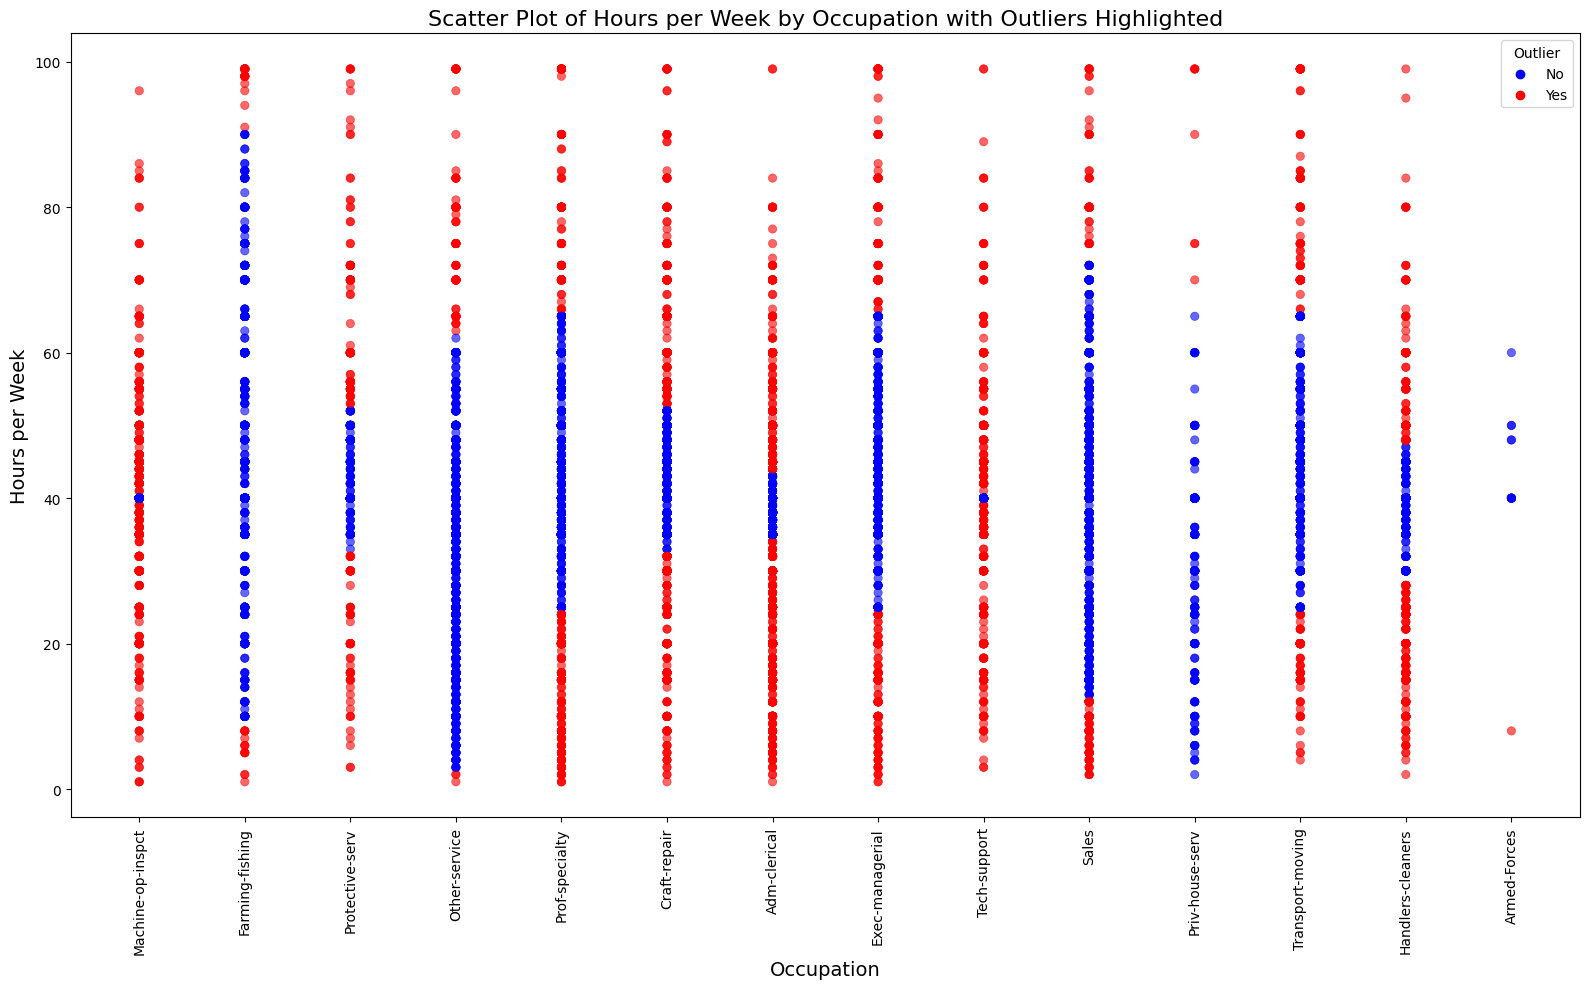

In [61]:
# Scatter plot highlighting outliers
plt.figure(figsize=(16, 10))
scatter = sns.scatterplot(
    data=adult_df,
    x='occupation',
    y='hours-per-week',
    hue='is_outlier',
    palette={True: 'red', False: 'blue'},
    alpha=0.6,
    edgecolor=None
)

# Create a custom legend to ensure colors match
handles, _ = scatter.get_legend_handles_labels()
plt.legend(
    handles=handles,
    labels=['No', 'Yes'],  # Match the order of the hue values
    title='Outlier'
)

plt.title('Scatter Plot of Hours per Week by Occupation with Outliers Highlighted', fontsize=16)
plt.xlabel('Occupation', fontsize=14)
plt.ylabel('Hours per Week', fontsize=14)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()